In [116]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer
word = SnowballStemmer('english')
import pandas as pd

Reading the data

In [117]:
df1 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\1.csv")
df2 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\2.csv")
df3 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\3.csv")
df4 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\4.csv")
df5 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\5.csv")
df6 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\6.csv")
df7 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\7.csv")
df8 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\8.csv")
df9 =   pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\9.csv")
df10 =  pd.read_csv("C:\\Users\\ABHAS\\Downloads\\transcript_data-20230927T115152Z-001\\transcript_data\\10.csv")
l = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]

Implemented/Tried some natural language processing, (NLP)

In [118]:
def transformed_text(text):
    text = nltk.word_tokenize(text)
    count = 0
    for i in text:
        text[count] = i.lower()
        text[count] = word.stem(str(i))
        count = count + 1
        if i in string.punctuation:
            text.remove(i)
    # for i in text:
    #     if i in stopwords.words('english'):
    #         text.remove(i)
        
    
    return " ".join(text)

In [119]:
df1['trans_text'] = df1['text'].apply(transformed_text)

In [120]:
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [121]:
df1['num_sentences'] = df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

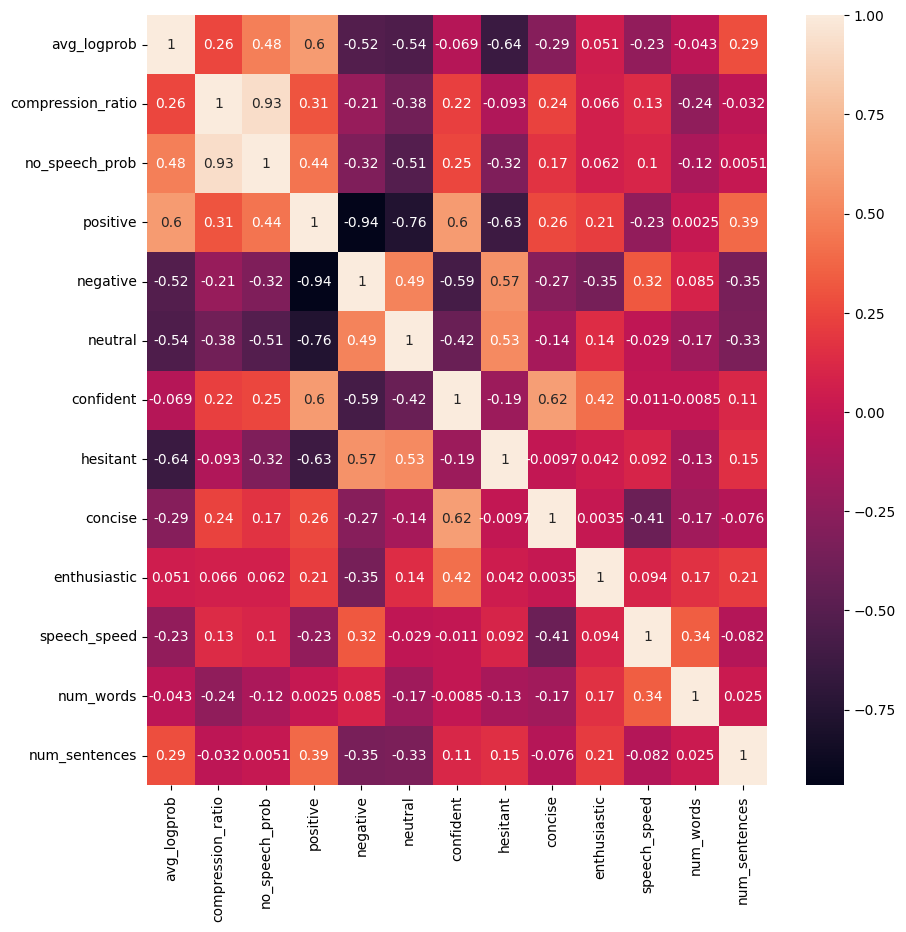

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df1.select_dtypes(include=[int,float]).iloc[:,5:].corr(),annot = True)


In [124]:
df1.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,...,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,trans_text,num_words,num_sentences
0,0,0,0.00,5.56,"Hello, I am Jeffrey Shepherd and I am current...","[50364, 2425, 11, 286, 669, 1587, 84, 2938, 49...",0.0,-0.447179,1.651235,0.63588,...,0.152281,0.267454,0.846701,0.845698,0.635805,0.647783,2.517986,hello I am jeffrey shepherd and i am current p...,15,1
1,1,0,5.56,9.60,IIM Coikode. I have completed my B.Tech in Bi...,"[50642, 286, 6324, 3066, 1035, 1429, 13, 286, ...",0.0,-0.447179,1.651235,0.63588,...,0.189263,0.260410,0.679283,0.733701,0.544145,0.417390,3.217822,iim coikod I have complet my b.tech in biotech...,14,2
2,2,0,9.60,14.48,"Technology Kolkata, followed by my M.Tech fro...","[50844, 15037, 26137, 74, 3274, 11, 6263, 538,...",0.0,-0.447179,1.651235,0.63588,...,0.111150,0.248990,0.902729,0.834620,0.715861,0.700062,2.868852,technolog kolkata followed by my m.tech from i...,16,2
3,3,0,14.48,18.48,of three years in the regulatory affairs doma...,"[51088, 295, 1045, 924, 294, 264, 18260, 17478...",0.0,-0.447179,1.651235,0.63588,...,0.399186,0.158919,0.774308,0.813044,0.522462,0.279916,3.750000,of three year in the regulatori affair domain ...,15,1
4,4,0,18.48,23.28,"as a medical writer in Ciro Klein Farm, Mumba...","[51288, 382, 257, 4625, 9936, 294, 383, 5182, ...",0.0,-0.447179,1.651235,0.63588,...,0.532010,0.231735,0.286049,0.561375,0.334381,0.197305,3.541667,as a medic writer in ciro klein farm Mumbai an...,18,1


In [125]:
df1.describe()

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,num_words,num_sentences
count,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,8.500000,3009.333333,41.002222,45.931111,0.0,-0.306962,1.666544,0.748891,0.709199,0.141214,0.149586,0.733828,0.485172,0.429418,0.466497,3.113771,16.222222,1.666667
std,5.338539,2598.468689,26.117009,26.294913,0.0,0.107591,0.148591,0.213651,0.207253,0.154933,0.080974,0.208330,0.260785,0.272635,0.286292,0.599958,1.628986,0.485071
min,0.000000,0.000000,0.000000,5.560000,0.0,-0.447179,1.129870,0.036593,0.236254,0.004977,0.014633,0.286049,0.008425,0.012767,0.088580,2.034884,13.000000,1.000000
25%,4.250000,0.000000,19.680000,24.400000,0.0,-0.447179,1.649819,0.635880,0.587941,0.043334,0.082926,0.576869,0.342871,0.280775,0.211429,2.605702,15.000000,1.000000
50%,8.500000,2776.000000,40.560000,46.640000,0.0,-0.278873,1.651235,0.833173,0.739705,0.080390,0.155741,0.789854,0.407792,0.441477,0.418900,3.134206,16.500000,2.000000
75%,12.750000,5336.000000,62.420000,66.660000,0.0,-0.196253,1.785235,0.910383,0.870056,0.160178,0.224622,0.898628,0.710799,0.612890,0.686992,3.589744,17.000000,2.000000
max,17.000000,8272.000000,82.720000,88.720000,0.0,-0.196253,1.785235,0.910383,0.980389,0.532010,0.267454,0.980931,0.845698,0.919735,0.990310,4.166667,19.000000,2.000000


Relation is between confident and positive, neutral and negative are also corelated and confident and consise are also corelated with each other.

In [126]:
import numpy as np

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0.2363'),
  Text(1, 0, '0.4003'),
  Text(2, 0, '0.4419'),
  Text(3, 0, '0.5503'),
  Text(4, 0, '0.5803'),
  Text(5, 0, '0.611'),
  Text(6, 0, '0.6399'),
  Text(7, 0, '0.7112'),
  Text(8, 0, '0.7265'),
  Text(9, 0, '0.7529'),
  Text(10, 0, '0.8066'),
  Text(11, 0, '0.8514'),
  Text(12, 0, '0.8689'),
  Text(13, 0, '0.8705'),
  Text(14, 0, '0.8721'),
  Text(15, 0, '0.9312'),
  Text(16, 0, '0.9341'),
  Text(17, 0, '0.9804')])

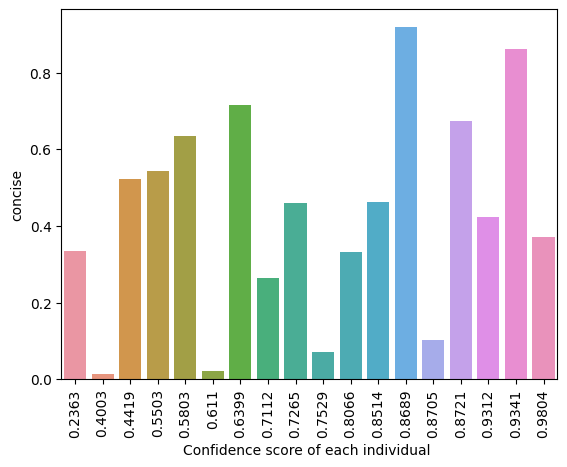

In [127]:
sns.barplot(x = np.round(df1['positive'],decimals=4),y = np.round(df1['concise'],decimals=4))
plt.xlabel('Confidence score of each individual ')
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0.286'),
  Text(1, 0, '0.4302'),
  Text(2, 0, '0.4651'),
  Text(3, 0, '0.5395'),
  Text(4, 0, '0.5688'),
  Text(5, 0, '0.601'),
  Text(6, 0, '0.6793'),
  Text(7, 0, '0.7291'),
  Text(8, 0, '0.7743'),
  Text(9, 0, '0.8054'),
  Text(10, 0, '0.8467'),
  Text(11, 0, '0.8931'),
  Text(12, 0, '0.8985'),
  Text(13, 0, '0.8987'),
  Text(14, 0, '0.9027'),
  Text(15, 0, '0.9336'),
  Text(16, 0, '0.976'),
  Text(17, 0, '0.9809')])

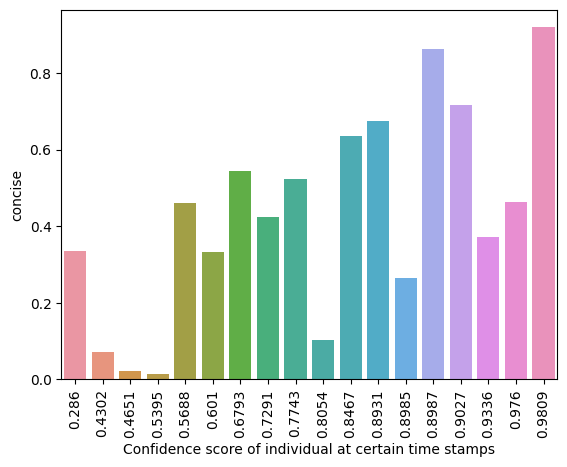

In [128]:
sns.barplot(x = np.round(df1['confident'],decimals=4),y = np.round(df1['concise'],decimals=4))
plt.xlabel('Confidence score of individual at certain time stamps')
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '0.2363'),
  Text(1, 0, '0.4003'),
  Text(2, 0, '0.4419'),
  Text(3, 0, '0.5503'),
  Text(4, 0, '0.5803'),
  Text(5, 0, '0.611'),
  Text(6, 0, '0.6399'),
  Text(7, 0, '0.7112'),
  Text(8, 0, '0.7265'),
  Text(9, 0, '0.7529'),
  Text(10, 0, '0.8066'),
  Text(11, 0, '0.8514'),
  Text(12, 0, '0.8689'),
  Text(13, 0, '0.8705'),
  Text(14, 0, '0.8721'),
  Text(15, 0, '0.9312'),
  Text(16, 0, '0.9341'),
  Text(17, 0, '0.9804')])

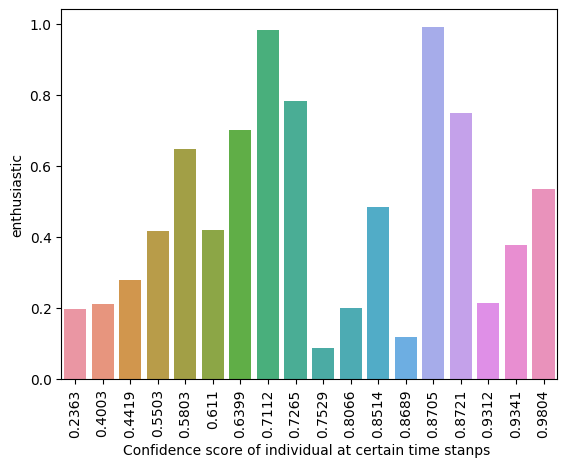

In [129]:
sns.barplot(x = np.round(df1['positive'],decimals=4),y = np.round(df1['enthusiastic'],decimals=4))
plt.xlabel('Confidence score of individual at certain time stanps ')
plt.xticks(rotation = 'vertical')

In [130]:
df1_new = df1[(df1['positive']>0.7) & (df1['confident']>0.75) & (df1['concise']>0.40)]

In [131]:
df1_new.shape

(4, 21)

In [132]:
corpus = []
df1_new = df1.loc[(df1['positive'] > 0.7) & (df1['confident'] > 0.75) & (df1['concise'] > 0.40)]
for msg in df1_new['trans_text'].tolist():

        for word in msg.split():
            corpus.append(word)

In [133]:
from collections import Counter

In [134]:
t1 = pd.DataFrame(data=Counter(corpus1).most_common(30))[0]
t2 = pd.DataFrame(data=Counter(corpus1).most_common(30))[1]

NameError: name 'corpus1' is not defined

In [135]:
sns.barplot(x = t1,y = t2)
plt.xticks(rotation = 'vertical')

NameError: name 't1' is not defined

In [136]:
new_corpus = []
df1_new = df1.loc[~((df1['positive'] > 0.7) & (df1['confident'] > 0.75) & (df1['concise'] > 0.40))]
for msg in df1_new['trans_text'].tolist():

        for word in msg.split():
            new_corpus.append(word)

In [137]:
sns.barplot(x = t1_new,y = t2_new)
plt.xticks(rotation = 'vertical')

NameError: name 't1_new' is not defined

In [138]:
t1_new = pd.DataFrame(data=Counter(new_corpus1).most_common(30))[0]
t2_new = pd.DataFrame(data=Counter(new_corpus1).most_common(30))[1]

NameError: name 'new_corpus1' is not defined

In [139]:
from collections import Counter
intersection = Counter(new_corpus) & Counter(corpus)
multiset_a_without_common = Counter(corpus) - intersection
multiset_b_without_common = Counter(new_corpus) - intersection
corpus1 = list(multiset_a_without_common.elements())
new_corpus1 = list(multiset_b_without_common.elements())

Merging the important information such as mean value and median value from the given datasets

In [140]:
median_list = []
mean_list=[]
columns = df1.describe().columns.tolist()
for i in l:
    median_list.append(i.describe().median().to_dict())
    mean_list.append(i.describe().mean().to_dict())

In [141]:
index = df1.describe().index.tolist()

In [142]:
median_list

[{'id': 8.5,
  'seek': 2687.234344663402,
  'start': 33.33850450355174,
  'end': 36.11301213008301,
  'temperature': 0.0,
  'avg_logprob': -0.23756336708036435,
  'compression_ratio': 1.6588890730110306,
  'no_speech_prob': 0.7910322722875409,
  'positive': 0.724451855238941,
  'negative': 0.1480737234395389,
  'neutral': 0.15266370685357183,
  'confident': 0.7618410752879249,
  'hesitant': 0.4464820025281774,
  'concise': 0.4354478476776017,
  'enthusiastic': 0.44269865502913797,
  'speech_speed': 3.1239885310392372,
  'num_words': 16.36111111111111,
  'num_sentences': 1.8333333333333335},
 {'id': 9.0,
  'seek': 2919.519505030503,
  'start': 35.87904317237749,
  'end': 38.300619297574336,
  'temperature': 0.0,
  'avg_logprob': -0.2840980012618487,
  'compression_ratio': 1.674936386768448,
  'no_speech_prob': 0.19977565771458966,
  'positive': 0.7135860512131138,
  'negative': 0.10544180378660947,
  'neutral': 0.16775151138733088,
  'confident': 0.728936333405344,
  'hesitant': 0.47973

In [143]:
c_mean = pd.DataFrame(data=mean_list)

In [144]:
c_mean

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,num_words,num_sentences
0,9.292317,2751.225253,36.312404,40.275753,2.250,2.029361,3.477066,2.786119,2.791350,2.389630,2.371992,2.809311,2.632693,2.621212,2.643625,4.655616,14.543901,3.518967
1,9.828414,2929.675929,39.179432,42.325155,2.375,2.145300,3.613021,2.565362,2.935910,2.474867,2.523749,2.902356,2.744883,2.769769,2.800881,4.887498,NaN,NaN
2,14.653247,3256.821209,44.434246,46.880442,3.500,3.268923,4.730459,3.739054,3.954385,3.770213,3.645055,3.966869,3.962690,3.835610,3.886295,6.089963,NaN,NaN
3,9.828414,3032.381529,41.586426,45.100765,2.375,2.166204,3.558205,2.613600,2.880466,2.535128,2.526811,2.846484,2.819875,2.710992,2.741514,4.505129,NaN,NaN
4,8.756219,1938.587005,30.370906,34.045266,2.125,1.904622,3.341789,2.337597,2.596860,2.329909,2.270479,2.577638,2.515132,2.471030,2.451070,4.356702,NaN,NaN
5,9.292317,2786.141782,36.580448,40.012588,2.250,2.016588,3.388306,2.494559,2.799514,2.388736,2.382560,2.773804,2.642506,2.557599,2.664776,4.176851,NaN,NaN
6,6.611805,2863.515653,36.611455,41.504137,1.625,1.355131,2.730705,1.727908,2.189681,1.770638,1.756075,2.149581,2.015139,1.961752,2.016252,3.392153,NaN,NaN
7,8.220119,2942.745349,39.943651,43.915558,2.000,1.785546,3.185096,2.266767,2.473124,2.162354,2.177872,2.444160,2.418215,2.289196,2.372412,4.227918,NaN,NaN
8,4.467327,2312.080898,26.102537,33.093727,1.125,0.896431,2.337695,1.542922,1.601679,1.345950,1.259375,1.579476,1.570256,1.431907,1.555254,3.684484,NaN,NaN
9,8.756219,2791.047358,38.066186,41.435695,2.125,1.895876,3.336115,2.345509,2.575178,2.359353,2.280164,2.612208,2.540559,2.454463,2.389211,4.657638,NaN,NaN


In [145]:
c_median = pd.DataFrame(data=median_list)

In [146]:
c_median

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,num_words,num_sentences
0,8.5,2687.234345,33.338505,36.113012,0.0,-0.237563,1.658889,0.791032,0.724452,0.148074,0.152664,0.761841,0.446482,0.435448,0.442699,3.123989,16.361111,1.833333
1,9.0,2919.519505,35.879043,38.300619,0.0,-0.284098,1.674936,0.199776,0.713586,0.105442,0.167752,0.728936,0.479738,0.495436,0.462211,3.256683,NaN,NaN
2,13.5,3378.284835,40.231983,41.939982,0.0,-0.296338,1.628420,0.255247,0.574314,0.257736,0.169950,0.635380,0.605269,0.399388,0.437083,3.471818,NaN,NaN
3,9.0,3068.973485,37.944650,40.498851,0.0,-0.275304,1.584427,0.259730,0.663043,0.158251,0.176619,0.642008,0.581111,0.404885,0.396652,2.730702,NaN,NaN
4,8.0,2285.848021,27.761861,30.240000,0.0,-0.285582,1.599309,0.220328,0.648368,0.180901,0.183025,0.620162,0.500734,0.378994,0.395135,2.797559,NaN,NaN
5,8.5,2732.900461,33.721793,36.095352,0.0,-0.248210,1.631968,0.263133,0.700261,0.139798,0.136488,0.708997,0.491073,0.362092,0.429028,2.628700,NaN,NaN
6,6.0,2816.793380,34.465822,38.858462,0.0,-0.333474,1.570843,0.113355,0.748492,0.147925,0.131264,0.714607,0.514286,0.357079,0.397698,2.314324,NaN,NaN
7,7.5,2947.606396,37.604603,40.122231,0.0,-0.265397,1.578446,0.275142,0.618011,0.173376,0.195480,0.563305,0.499935,0.319613,0.413699,2.859488,NaN,NaN
8,4.0,2388.888889,24.632372,29.097130,0.0,-0.300102,1.624771,0.505501,0.630634,0.224664,0.153436,0.598666,0.598843,0.342365,0.450909,3.387191,NaN,NaN
9,8.0,2734.630609,34.778863,37.222779,0.0,-0.285740,1.656915,0.221948,0.591653,0.213674,0.194627,0.676138,0.485429,0.386988,0.304154,3.208766,NaN,NaN


Used graphs for analysis of trends

In [147]:
arr = [i for i in range(1,11)]

In [148]:
arr

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

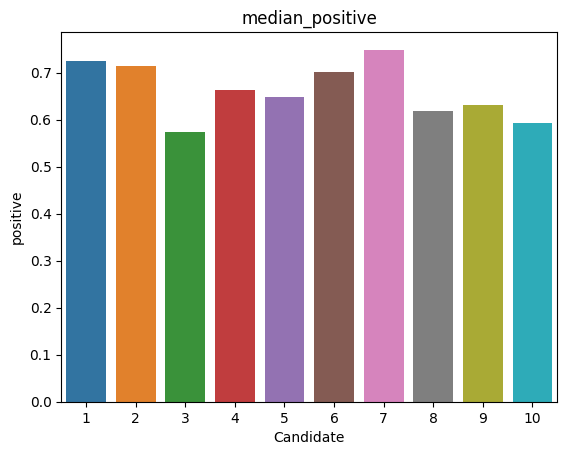

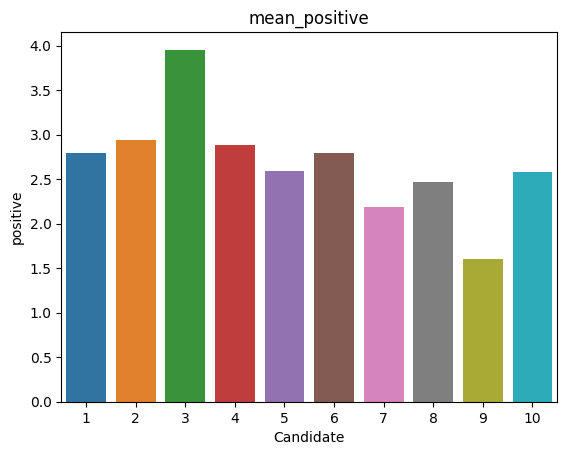

In [149]:
plt.title('median_positive')
sns.barplot(y = c_median['positive'],x=arr)
plt.xlabel('Candidate')
plt.show()
plt.title('mean_positive')
sns.barplot(y = c_mean['positive'],x=arr)
plt.xlabel('Candidate')
plt.show()

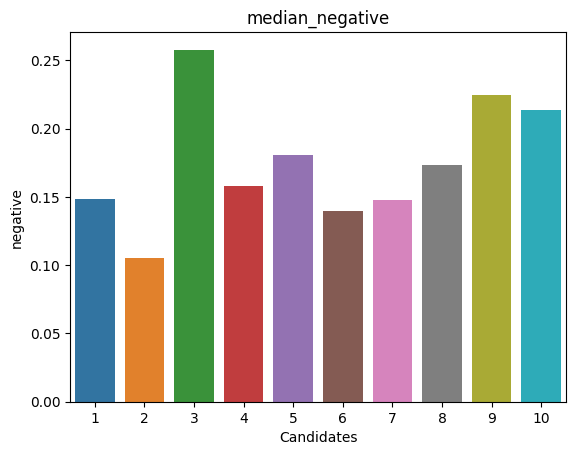

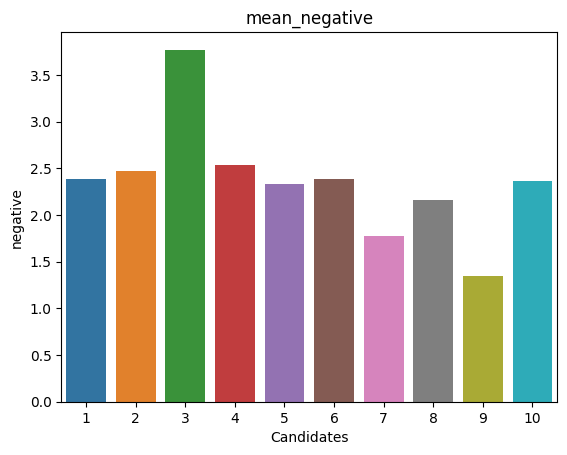

In [150]:
plt.title('median_negative')
sns.barplot(y = c_median['negative'],x=arr)
plt.xlabel('Candidates')
plt.show()
plt.title('mean_negative')
sns.barplot(y = c_mean['negative'],x=arr)
plt.xlabel('Candidates')
plt.show()

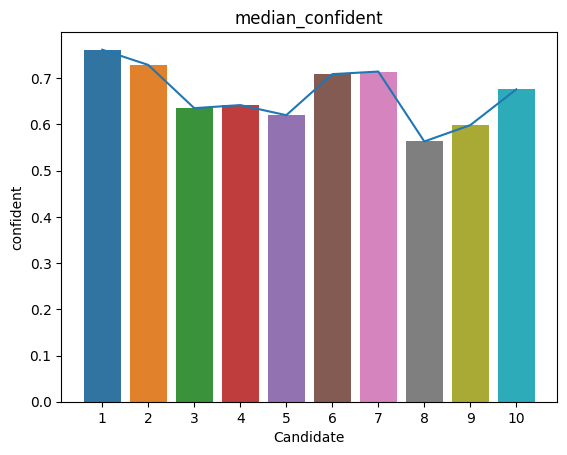

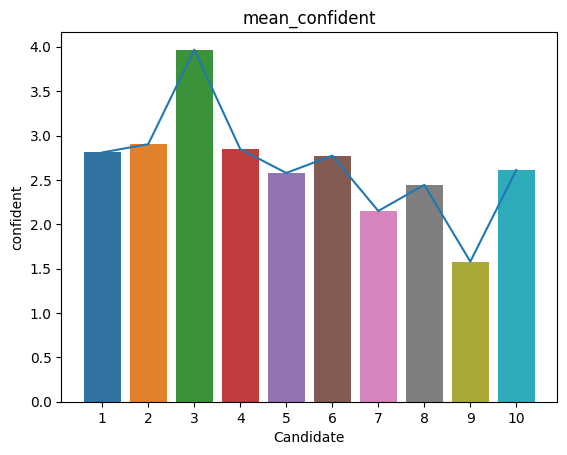

In [151]:
plt.title('median_confident')
sns.barplot(y = c_median['confident'],x=arr)
sns.lineplot(y = c_median['confident'],x=c_mean.index.tolist())
plt.xlabel('Candidate')
plt.show()
plt.title('mean_confident')
sns.barplot(y = c_mean['confident'],x=arr)
sns.lineplot(y = c_mean['confident'],x=c_median.index.tolist())
plt.xlabel('Candidate')
plt.show()

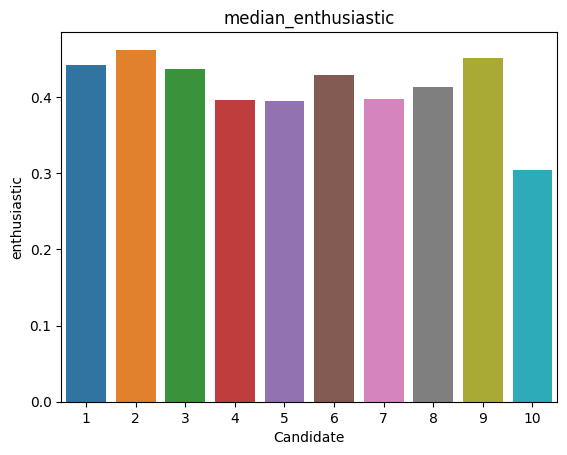

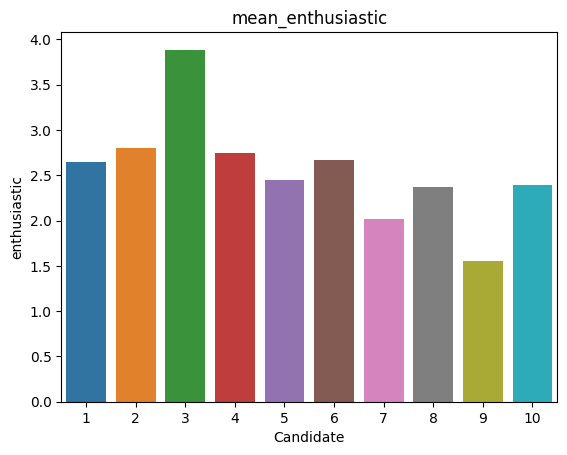

In [152]:
plt.title('median_enthusiastic')
sns.barplot(y = c_median['enthusiastic'],x=arr)
plt.xlabel('Candidate')
plt.show()
plt.title('mean_enthusiastic')
sns.barplot(y = c_mean['enthusiastic'],x=arr)
plt.xlabel('Candidate')
plt.show()

<Axes: >

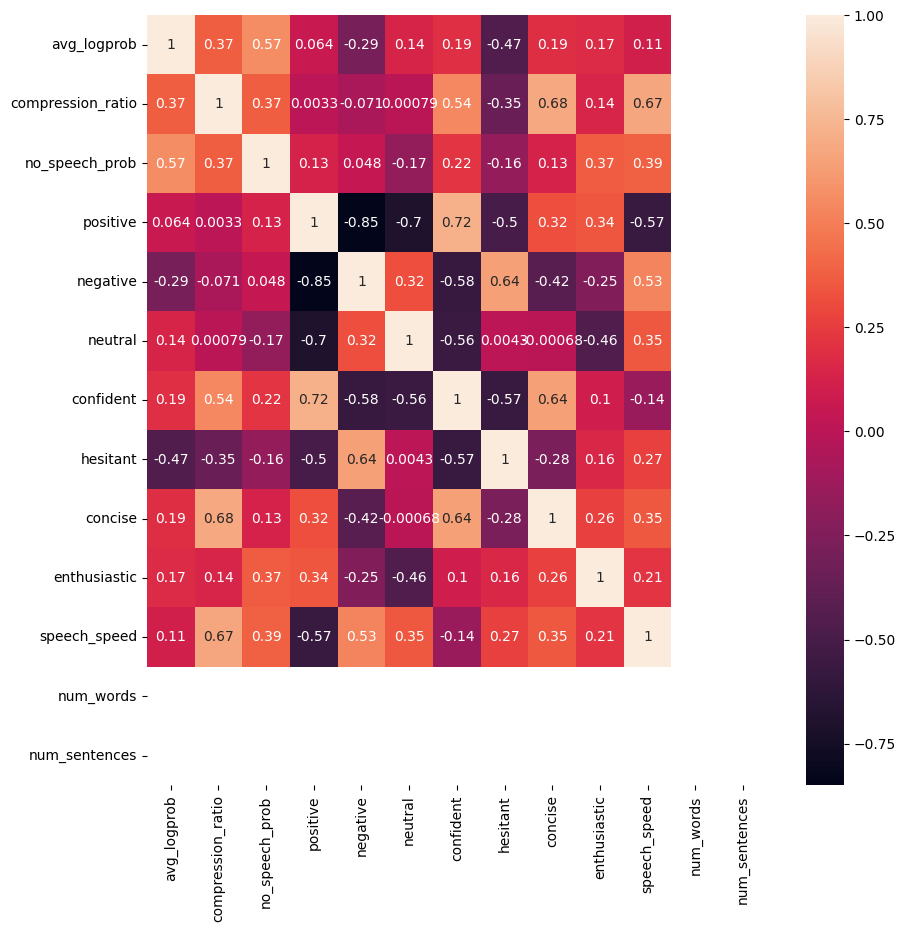

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(data=c_median.select_dtypes(include=[int,float]).iloc[:,5:].corr(),annot = True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '3.392'),
  Text(1, 0, '3.684'),
  Text(2, 0, '4.177'),
  Text(3, 0, '4.228'),
  Text(4, 0, '4.357'),
  Text(5, 0, '4.505'),
  Text(6, 0, '4.656'),
  Text(7, 0, '4.658'),
  Text(8, 0, '4.887'),
  Text(9, 0, '6.09')])

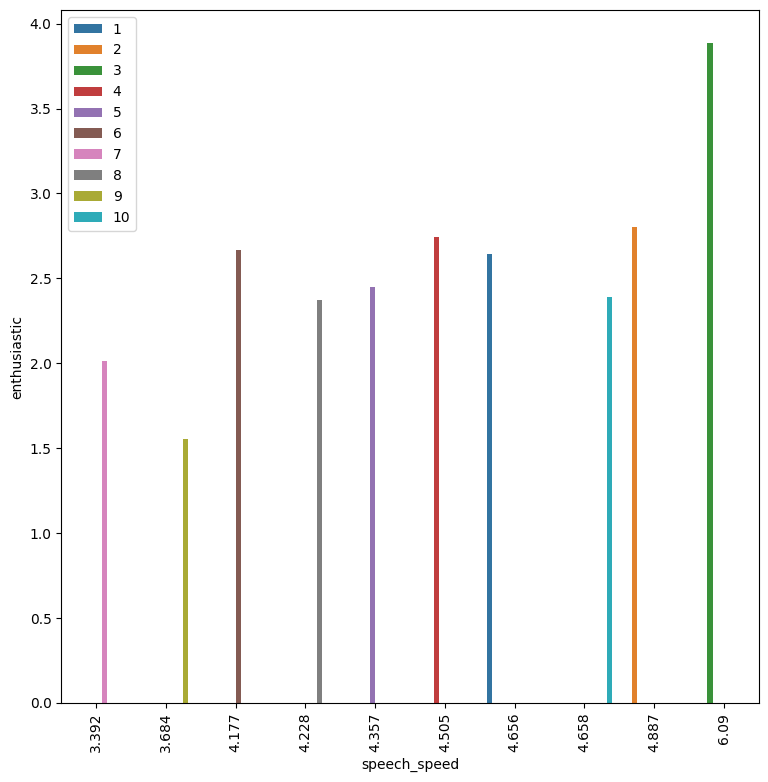

In [154]:
plt.figure(figsize=(9,9))
sns.barplot(data = c_mean,y=c_mean['enthusiastic'],x=np.round(c_mean['speech_speed'],decimals=3),hue=arr)
plt.xticks(rotation = 'vertical')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1.5794758051024114'),
  Text(1, 0, '2.1495813541855107'),
  Text(2, 0, '2.444159507344062'),
  Text(3, 0, '2.577637897245478'),
  Text(4, 0, '2.6122083476982607'),
  Text(5, 0, '2.7738044430969944'),
  Text(6, 0, '2.8093111807858113'),
  Text(7, 0, '2.846483524775391'),
  Text(8, 0, '2.902356091041896'),
  Text(9, 0, '3.9668689004115527')])

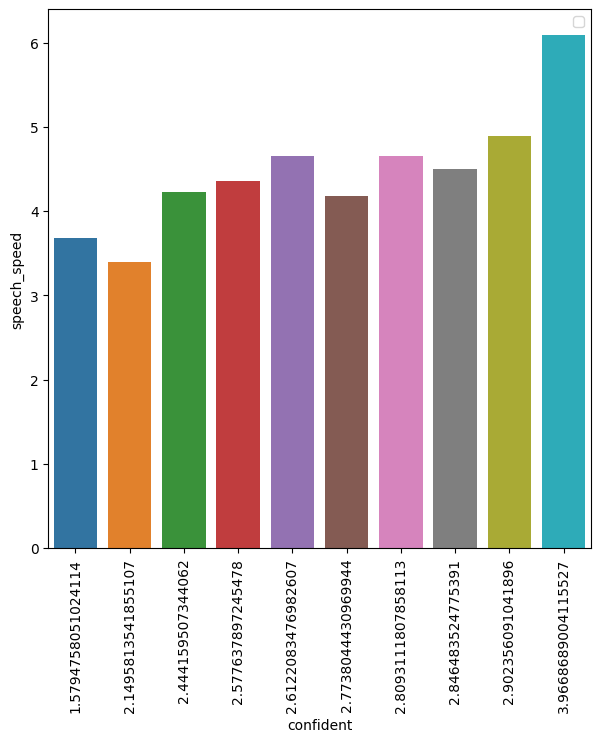

In [155]:
plt.figure(figsize=(7,7))
sns.barplot(data = c_mean,x=c_mean['confident'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
plt.legend()
plt.xticks(rotation = 'vertical')

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5')])

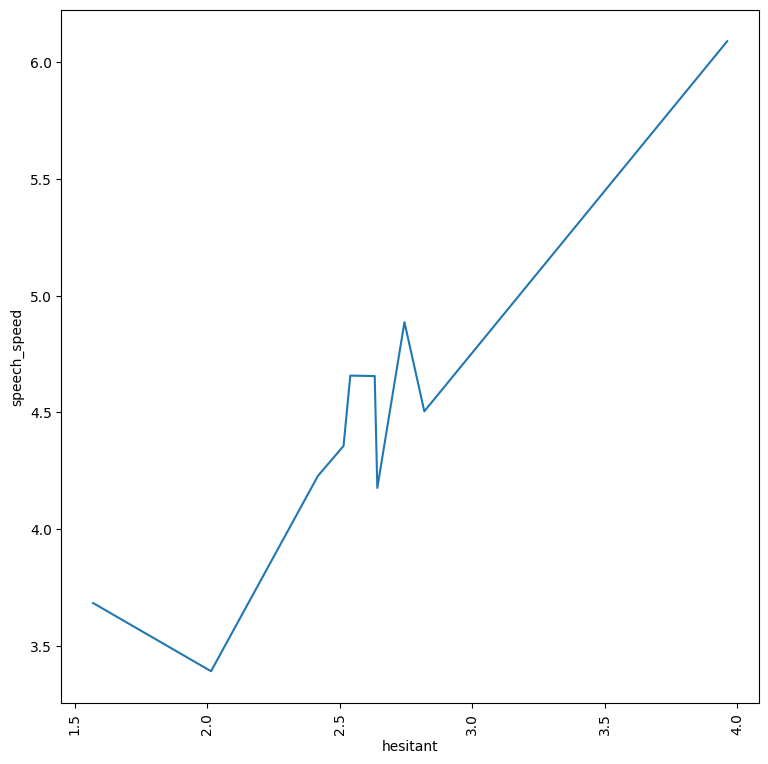

In [156]:
plt.figure(figsize=(9,9))
sns.lineplot(data = c_mean,x=c_mean['hesitant'],y=np.round(c_mean['speech_speed'],decimals=3),
            #  hue=arr
             )
plt.xticks(rotation = 'vertical')

(array([1., 2., 3., 4., 5., 6., 7.]),
 [Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

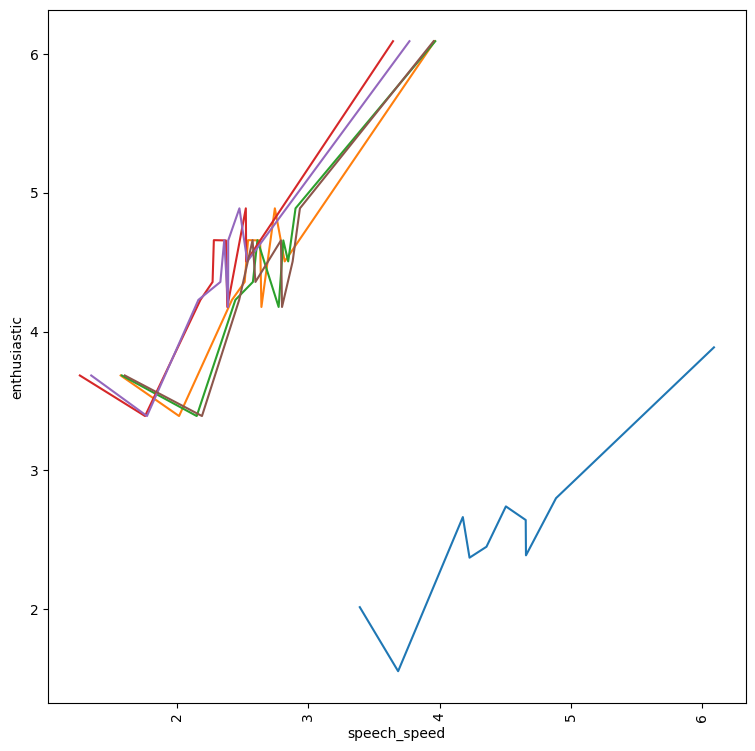

In [157]:
plt.figure(figsize=(9,9))
sns.lineplot(data = c_mean,y=c_mean['enthusiastic'],x=np.round(c_mean['speech_speed'],decimals=3),
            #  hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['hesitant'],y=np.round(c_mean['speech_speed'],decimals=3),
            #  hue=arr
             )
sns.lineplot(data = c_mean,x=c_mean['confident'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['neutral'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['negative'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['positive'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
plt.xticks(rotation = 'vertical')

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
c_mean.columns.tolist()

['id',
 'seek',
 'start',
 'end',
 'temperature',
 'avg_logprob',
 'compression_ratio',
 'no_speech_prob',
 'positive',
 'negative',
 'neutral',
 'confident',
 'hesitant',
 'concise',
 'enthusiastic',
 'speech_speed',
 'num_words',
 'num_sentences']

In [160]:
mms = MinMaxScaler()
c_mean1 = []
for i in c_mean.columns.tolist():
    c_mean1 = mms.fit_transform(c_mean)

In [171]:
c_mean1 = pd.DataFrame(c_mean1,columns=c_mean.columns)

In [172]:
c_mean1

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,num_words,num_sentences
0,0.473692,0.616460,0.556951,0.520938,0.473684,0.477528,0.476174,0.566085,0.505661,0.430514,0.466373,0.515137,0.444082,0.494780,0.466904,0.468329,0.0,0.0
1,0.526323,0.751831,0.713348,0.669589,0.526316,0.526396,0.532993,0.465564,0.567105,0.465674,0.529985,0.554111,0.490976,0.556584,0.534365,0.554281,NaN,NaN
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
3,0.526323,0.829742,0.844651,0.870914,0.526316,0.535206,0.510084,0.487529,0.543539,0.490532,0.531268,0.530708,0.522321,0.532131,0.508897,0.412548,NaN,NaN
4,0.421061,0.000000,0.232841,0.069019,0.421053,0.424950,0.419637,0.361852,0.422994,0.405880,0.423822,0.418097,0.394943,0.432301,0.384299,0.357531,NaN,NaN
5,0.473692,0.642947,0.571573,0.501850,0.473684,0.472144,0.439078,0.433324,0.509131,0.430145,0.470803,0.500265,0.448184,0.468316,0.475977,0.290865,NaN,NaN
6,0.210534,0.701642,0.573265,0.610037,0.210526,0.193341,0.164249,0.084233,0.249926,0.175182,0.208201,0.238798,0.185954,0.220429,0.197765,0.000000,NaN,NaN
7,0.368429,0.761745,0.755037,0.784946,0.368421,0.374760,0.354151,0.329600,0.370401,0.336764,0.385004,0.362187,0.354434,0.356653,0.350555,0.309794,NaN,NaN
8,0.000000,0.283329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108359,NaN,NaN
9,0.421061,0.646668,0.652621,0.605073,0.421053,0.421264,0.417266,0.365455,0.413778,0.418025,0.427882,0.432578,0.405572,0.425409,0.357762,0.469079,NaN,NaN


In [167]:
len(l1[:][:])

10

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

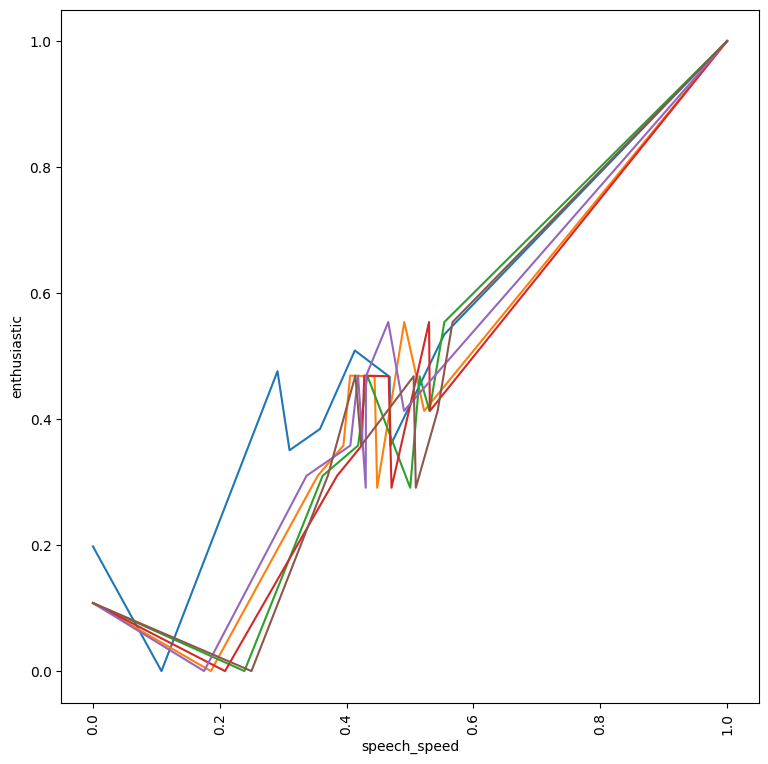

In [174]:
plt.figure(figsize=(9,9))
sns.lineplot(data = c_mean1,y=c_mean1['enthusiastic'],x=np.round(c_mean1['speech_speed'],decimals=3),
            #  hue=arr
            )
sns.lineplot(data = c_mean1,x=c_mean1['hesitant'],y=np.round(c_mean1['speech_speed'],decimals=3),
            #  hue=arr
             )
sns.lineplot(data = c_mean1,x=c_mean1['confident'],y=np.round(c_mean1['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean1,x=c_mean1['neutral'],y=np.round(c_mean1['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean1,x=c_mean1['negative'],y=np.round(c_mean1['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean1,x=c_mean1['positive'],y=np.round(c_mean1['speech_speed'],decimals=3)
            # ,hue=arr
            )
plt.xticks(rotation = 'vertical')

(array([1., 2., 3., 4., 5., 6., 7.]),
 [Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7')])

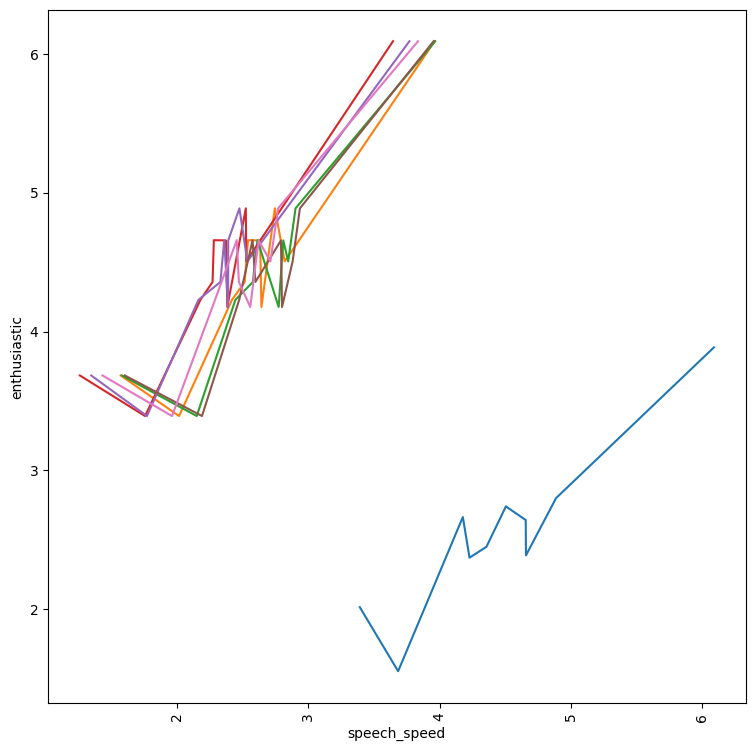

In [208]:
plt.figure(figsize=(9,9))
sns.lineplot(data = c_mean,y=c_mean['enthusiastic'],x=np.round(c_mean['speech_speed'],decimals=3),
            #  hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['hesitant'],y=np.round(c_mean['speech_speed'],decimals=3),
            #  hue=arr
             )
sns.lineplot(data = c_mean,x=c_mean['confident'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['neutral'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['negative'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['positive'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean,x=c_mean['concise'],y=np.round(c_mean['speech_speed'],decimals=3)
            # ,hue=arr
            )
plt.xticks(rotation = 'vertical')

In [38]:
c_mean.head()

,id,seek,start,end,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed,num_words,num_sentences
0,9.292317,2751.225253,36.312404,40.275753,2.250,2.029361,3.477066,2.786119,2.791350,2.389630,2.371992,2.809311,2.632693,2.621212,2.643625,4.655616,14.543901,3.518967
1,9.828414,2929.675929,39.179432,42.325155,2.375,2.145300,3.613021,2.565362,2.935910,2.474867,2.523749,2.902356,2.744883,2.769769,2.800881,4.887498,NaN,NaN
2,14.653247,3256.821209,44.434246,46.880442,3.500,3.268923,4.730459,3.739054,3.954385,3.770213,3.645055,3.966869,3.962690,3.835610,3.886295,6.089963,NaN,NaN
3,9.828414,3032.381529,41.586426,45.100765,2.375,2.166204,3.558205,2.613600,2.880466,2.535128,2.526811,2.846484,2.819875,2.710992,2.741514,4.505129,NaN,NaN
4,8.756219,1938.587005,30.370906,34.045266,2.125,1.904622,3.341789,2.337597,2.596860,2.329909,2.270479,2.577638,2.515132,2.471030,2.451070,4.356702,NaN,NaN


In [177]:
from sklearn.preprocessing import RobustScaler

In [181]:
rbs = RobustScaler()
c_mean2 = []
for i in c_mean.columns.tolist():
    c_mean2 = rbs.fit_transform(c_mean)

In [182]:
c_mean2 = pd.DataFrame(c_mean2,columns=c_mean.columns)

(array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 [Text(-6.0, 0, '−6'),
  Text(-4.0, 0, '−4'),
  Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8')])

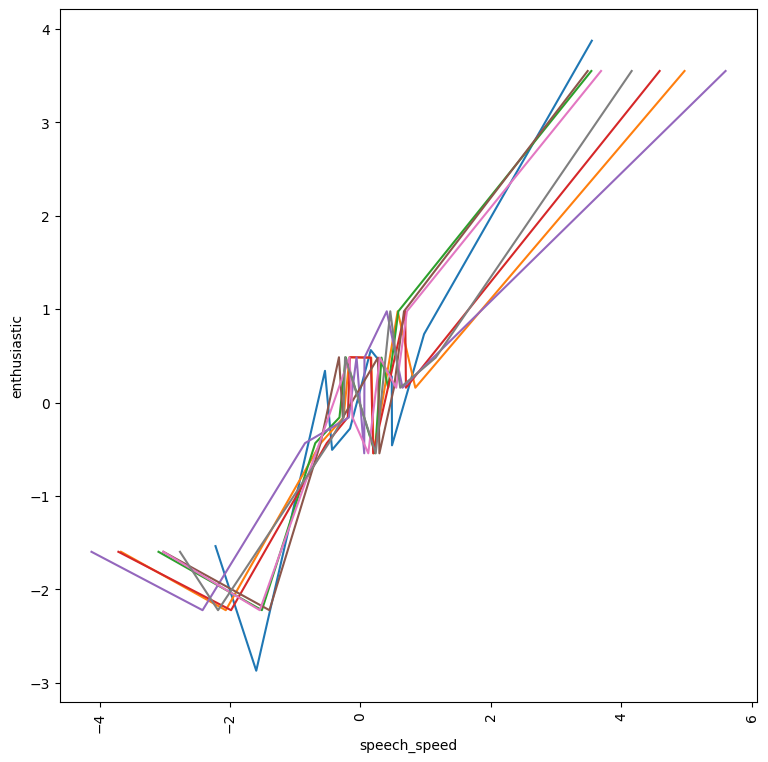

In [207]:
plt.figure(figsize=(9,9))
sns.lineplot(data = c_mean2,y=c_mean2['enthusiastic'],x=np.round(c_mean2['speech_speed'],decimals=3),
            #  hue=arr
            )
sns.lineplot(data = c_mean2,x=c_mean2['hesitant'],y=np.round(c_mean2['speech_speed'],decimals=3),
            #  hue=arr
             )
sns.lineplot(data = c_mean2,x=c_mean2['confident'],y=np.round(c_mean2['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean2,x=c_mean2['neutral'],y=np.round(c_mean2['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean2,x=c_mean2['negative'],y=np.round(c_mean2['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean2,x=c_mean2['positive'],y=np.round(c_mean2['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean2,x=c_mean2['concise'],y=np.round(c_mean2['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean2,x=c_mean2['no_speech_prob'],y=np.round(c_mean2['speech_speed'],decimals=3)
            # ,hue=arr
            )
plt.xticks(rotation = 'vertical')

In [184]:
from sklearn.preprocessing import StandardScaler

In [198]:
ssc = StandardScaler()
c_mean3 = []
for i in c_mean.columns.tolist():
    c_mean3 = ssc.fit_transform(c_mean)

In [204]:
c_mean3 = pd.DataFrame(c_mean3,columns=c_mean.columns)

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3')])

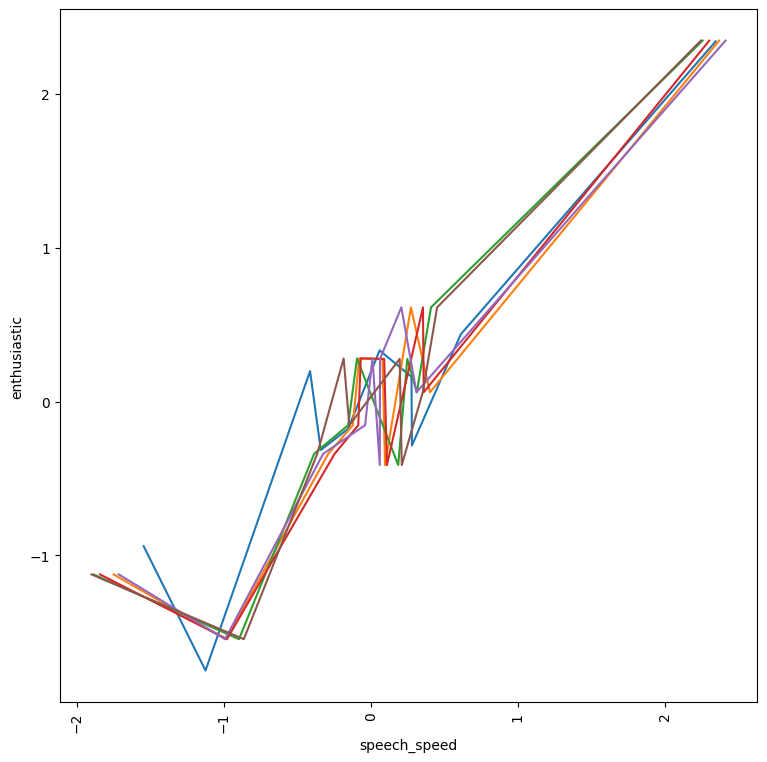

In [205]:
plt.figure(figsize=(9,9))
sns.lineplot(data = c_mean3,y=c_mean3['enthusiastic'],x=np.round(c_mean3['speech_speed'],decimals=3),
            #  hue=arr
            )
sns.lineplot(data = c_mean3,x=c_mean3['hesitant'],y=np.round(c_mean3['speech_speed'],decimals=3),
            #  hue=arr
             )
sns.lineplot(data = c_mean3,x=c_mean3['confident'],y=np.round(c_mean3['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean3,x=c_mean3['neutral'],y=np.round(c_mean3['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean3,x=c_mean3['negative'],y=np.round(c_mean3['speech_speed'],decimals=3)
            # ,hue=arr
            )
sns.lineplot(data = c_mean3,x=c_mean3['positive'],y=np.round(c_mean3['speech_speed'],decimals=3)
            # ,hue=arr
            )
plt.xticks(rotation = 'vertical')